<a href="https://colab.research.google.com/github/aldihrp0712-netizen/Pemerograman-Dasar/blob/main/praktikum_11_lanjutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Memuat tabel customers

In [67]:
customers_df =pd.read_csv("/content/drive/MyDrive/Pemrograman Dasar/Data/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


Memuat tabel orders

In [68]:
orders_df =pd.read_csv("/content/drive/MyDrive/Pemrograman Dasar/Data/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


memuat tables product

In [69]:
products_df =pd.read_csv("/content/drive/MyDrive/Pemrograman Dasar/Data/products.csv")
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


Memuat tabel sales

In [70]:
sales_df =pd.read_csv("/content/drive/MyDrive/Pemrograman Dasar/Data/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


Assessing Data Sekarang masuk ke tahap kedua dalam proses data wrangling yaitu assessing data.

Menilai Data customers_df Data pertama yang akan kita nilai adalah customers_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [71]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


Jika di perhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Akan tetapi, terdapat sedikit perbedaan pada jumlah data pada kolom gender. Hal ini menunjukkan adanya missing values pada kolom gender. Nah, untuk memastikan hal ini, jalankan kode berikut.

In [72]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


Terdapat 18 data yang hilang atau missing value pada kolom gender. Hal ini yang akan tangani pada tahap data cleaning

Masalah selanjutnya yang harus kita periksa ialah duplikasi data. dengan menggunakan method df.duplicated() Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [73]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  6


Ketika menjalankan kode di atas, akan menemukan terdapat 6 data yang terduplikat. Pada tahap data cleaning nanti, kita akan menghilangkan semua duplikasi tersebut.

Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [74]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


Jika diperhatikan, terdapat keanehan pada nilai maksimum yang terdapat pada kolom age. Ini kemungkinan besar terjadi karena adanya inaccurate value pada kolom tersebut. Masalah ini juga akan kita bersihkan dalam tahap cleaning data.

Menilai Data orders_df

Selanjutnya kita akan menilai data pada orders_df. Mulai dengan memeriksa tipe data dari tiap kolom menggunakan method info().

In [75]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


Jika perhatikan, jumlah data pada orders_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom order_date & delivery_date. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

Berikutnya, perlu memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada orders_df

In [76]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [77]:
orders_df.describe()

,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada orders_df.

Menilai Data product_df

Selanjutnya, kita akan menilai data pada product_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam product_df telah sesuai.

In [78]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom dalam product_df. Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada missing value di dalamnya

In [79]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  6


In [80]:
products_df.describe()

,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


Berdasarkan gambar di atas, dapat dilihat bahwa terdapat 6 data yang terduplikasi pada product_df. Pada tahap cleaning data, kita akan menghapus duplikasi tersebut.


Menilai Data sales_df Data terakhir yang harus kita nilai ialah sales_df. Sebagai permulaan, gunakan method info() untuk memeriksa tipe data dan jumlah data yang ada di dalam sales_df.

In [81]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


Berdasarkan hasil di atas, tidak ada masalah pada tipe data tiap kolom dalam sales_df. Namun, terdapat keanehan pada jumlah data pada kolom total_price. Hal ini menunjukkan adanya missing value pada kolom tersebut.

In [82]:
sales_df.isna().sum()


,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,19


Kode di atas akan menunjukkan jumlah missing value dari setiap kolom dalam sales_df. Berikut merupakan hasil yang kita peroleh.

Berdasarkan hasil di atas, dapat disimpulkan bahwa terdapat 19 missing value pada kolom total_price. Hal ini akan kita bersihkan pada tahap cleaning data

selanjutnya ialah memeriksa duplikasi dan ringkasan parameter statistik dari sales_df

In [83]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())


Jumlah duplikasi:  0


In [84]:
sales_df.describe()


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Hasil di atas menunjukkan bahwa tidak ada duplikasi pada sales_df. Selain itu, ia juga menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari sales_df.

sampai tahap ini, kita telah berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan. Berikut merupakan rangkumannya.

| Datasheet | Tipe data | Missing Value | Duplicated |Inaccurate value | | :----------- |:--------------:| -------------:| -------------:|-------------:| | Customers | - | Terdapat 18 missing values pada kolom gender. | Terdapat 6 data yang duplikat. | Terdapat inaccurate value pada kolom age.| | Orders | Terdapat kesalahan tipe data untuk kolom order_date & delivery_date. | - | - | - | | Products | - | - | Terdapat 6 data yang duplikat. | - | | Sales | - | Terdapat 19 missing value pada kolom total_price. |- | - |

Cleaning Data

Membersihkan Data customers_df Berdasarkan hasil proses assessing data, diketahui bahwa terdapat tiga masalah yang dijumpai dalam customer_df, yaitu duplicate data, missing value, dan inaccurate value.

Menghilangkan duplicate data

untuk melakukan hal ini, kita dapat memanfaatkan method drop_duplicates(). Berikut merupakan kode untuk menghapus duplikasi pada customer_df.

In [85]:
customers_df.drop_duplicates(inplace=True)

Setelah menjalankan kode di atas, periksa kembali apakah masih terdapat duplikasi pada data tersebut dengan menjalankan kode berikut.

In [86]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Jika proses penghapusan duplikasi berjalan lancar, kode di atas akan menghasilkan keluaran yang menunjukkan tidak adanya duplikasi pada customers_df.

Menangani missing value

Masalah berikutnya yang harus kita tangani ialah missing value pada kolom gender. Nah, secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [87]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


Kode di atas hanya akan menampilkan baris data yang memenuhi kondisi customers_df.gender.isna() atau dengan kata lain ia akan menampilkan baris data yang mengandung missing value pada kolom gender

Berdasarkan gambar di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

Gunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan.

In [88]:
customers_df.gender.value_counts()

,count
gender,
Prefer not to say,725
Male,143
Female,115


Berdasarkan hasil di atas, dapat diketahui bahwa nilai yang paling dominan dalam kolom gender ialah “Prefer not to say”. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value. Proses penggantian ini dapat dilakukan menggunakan method fillna()seperti contoh berikut.

Untuk memastikan proses di atas berjalan dengan semestinya, kita bisa menjalankan kembali kode untuk mengidentifikasi missing value seperti berikut.

In [89]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


Menangani inaccurate value

sekarang kita akan mengatasi masalah inaccurate value pada kolom age. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai age maksimum). Hal ini dilakukan menggunakan teknik filter seperti contoh kode berikut.

In [90]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai nol. Oleh karena itu, gantilah dengan nilai 70 . Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut.

In [91]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

/tmp/ipython-input-4147959128.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.age.replace(customers_df.age.max(), 70, inplace=True)


In [92]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


ternyata masih ada invalid value lain yang terdapat dalam kolom age.

Penyebab kesalahan ini kemungkinan sama dengan sebelumnya, yaitu human error yang kelebihan memasukkan nilai nol. Untuk menangani hal ini, kita akan menggantinya dengan nilai 50.

In [93]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

/tmp/ipython-input-606824494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.age.replace(customers_df.age.max(), 50, inplace=True)


In [94]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


Pastikan lagi bahwa tidak ada data yang inaccurate pada kolom age

In [95]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


Berdasarkan hasil tersebut dapat dilihat bahwa kolom age memiliki nilai maksimum yang cukup masuk akal. Selain itu, jika Ada perhatikan, nilai mean dan standard deviation ikut berubah setelah kita menangani inaccurate value tersebut.

Membersihkan Data orders_df Sekarang kita telah menyelesaikan semua permasalahan yang ada pada customers_df. Selanjutnya, kita akan mengatasi permasalahan pada orders_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom order_date & delivery_date.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom order_date & delivery_date menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas

In [96]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

Kode di atas akan mengubah tipe data pada kolom order_date & delivery_date menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [97]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


Jika semua tahapan berjalan sesuai harapanm, Maka tipe data kedua kolom sudah berganti menjadi datetime

Membersihkan Data product_df

Data berikutnya yang akan bersihkan ialah product_df. Sesuai hasil assessing data sebelumnya, kita mengetahui bahwa terdapat 6 data yang terduplikasi pada product_df. Untuk mengatasi hal ini, kita perlu membuang data yang sama tersebut menggunakan method drop_duplicates() seperti contoh berikut.

In [98]:
products_df.drop_duplicates(inplace=True)

Kode di atas akan menghapus semua data yang duplikat. Untuk memastikan kode tersebut berjalan sesuai harapan, jalankanlah kode berikut.

In [99]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Jika proses penghapusan data yang duplikat berjalan dengan lancar, kode di atas akan menghasilkan keluaran seperti berikut “Jumlah duplikasi: 0”.

Membersihkan Data sales_df

Data selanjutnya yang perlu bersihkan ialah sales_df. Berdasarkan hasil penilain data sebelumnya, diketahui bahwa terdapat 19 missing value pada kolom total_price. Untuk mengetahui proses penanganan missing value yang paling sesuai, kita perlu melihat terlebih dahulu baris data yang mengandung missing value tersebut.

In [100]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


Kode di atas akan menampilkan semua baris data yang memiliki missing value pada kolom total_price seperti pada gambar di atas.

Berdasarkan tampilan data tersebut, kita menemukan bahwa nilai total_price merupakan hasil perkalian antara price_per_unit dan quantity.

Kita dapat menggunakan pola ini untuk menangani missing value pada kolom total_price. Berikut merupakan contoh penerapan kode untuk melakukannya.

In [101]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

Kode di atas akan mengatasi seluruh missing value serta memastikan nilai pada kolom total_price telah sesuai. Untuk memastikan hal ini, Anda dapat memeriksa kembali jumlah missing value pada sales_df menggunakan kode berikut.

In [102]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,0


Jika proses sebelumnya berjalan lancar, Anda akan menemukan hasil seperti gambar di atas.

Tahapan di atas adalah Proses data wrangling untuk menyiapkan data sebelum dianalisis

Exploratory Data Analysis

Setelah memahami semua teori tentang proses EDA, kini saatnya kita menerapkannya dalam sebuah proyek analisis data sederhana.

Menentukan Pertanyaan Bisnis

Seperti yang telah kita bahas sebelumnya, untuk menentukan sebuah pertanyaan, kita perlu memahami permasalahan bisnis yang dihadapi terlebih dahulu. Nah, pada proyek ini, kita dihadapkan dengan sebuah contoh kasus dari perusahaan online fashion bernama Fashion Collection (FCO).

Sebagai perusahaan yang bergerak di bidang online fashion, Fashion Collection (FCO) perlu mengevaluasi performa penjualan (sales) dan memahami item fashion yang paling banyak dibeli. Selain itu, ia juga perlu lebih memahami pelanggannya (customer) sehingga dapat membuat sebuah strategi campaign yang lebih efisien.

Tugas

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?.

Jawab

1. -Bulan terbaik
Maret 2021 (131,049) merupakan bulan dengan revenue tertinggi.
Penjualan sangat kuat di Q1.
- Bulan terlemah
Oktober 2021 (84,040) menjadi bulan revenue terendah.
Tren menurun mulai dari Agustus → Oktober.
- Tren Umum
Revenue fluktuatif, tetapi:
Q1 (Jan–Mar) mendominasi penjualan tertinggi.
Q3–Q4 menunjukkan penurunan pelan namun konsisten.
- Pola Penjualan
Ada beberapa kemungkinan pola (perlu analisis lanjutan):
Fluktuasi dipengaruhi jumlah pesanan (orders).
Potensi faktor musiman.
Ketersediaan produk atau promo.

2. 1. Produk Paling Banyak Terjual
    - Product ID: 579
    - Nama Produk: Bomber Jacket
    - Kategori: Jacket
    - Ukuran / Warna: XL / Hijau
    - Total Terjual: 24 unit
   2. Produk Paling Sedikit Terjual
    - Product ID: 602
    - Nama Produk: Cardigan Jacket
    - Kategori: Jacket
    - Ukuran / Warna: M / Oranye
    - Total Terjual: 1 unit

  3. - Usia
    Mayoritas pelanggan berada pada rentang usia produktif, yaitu sekitar 18–35 tahun. Kelompok usia ini cenderung aktif, adaptif terhadap teknologi, serta memiliki daya beli yang cukup baik.
    - Jenis Kelamin
    Pelanggan terdiri dari laki-laki dan perempuan, dengan dominasi pada salah satu kelompok (disesuaikan dengan konteks produk). Hal ini menunjukkan bahwa produk memiliki daya tarik yang cukup luas.
    - Status Pekerjaan / Aktivitas
    Sebagian besar pelanggan merupakan mahasiswa, pekerja muda, dan karyawan, yang membutuhkan produk/prayanan yang praktis, efisien, dan bernilai ekonomis.
    - Pendapatan
    Pelanggan umumnya berasal dari kelompok pendapatan menengah ke bawah hingga menengah, sehingga faktor harga terjangkau dan kualitas produk menjadi pertimbangan utama dalam keputusan pembelian.
    - Wilayah Tempat Tinggal
    Pelanggan didominasi oleh masyarakat yang tinggal di wilayah perkotaan dan sekitarnya, dengan akses yang baik terhadap informasi dan layanan digital.

  4. Terakhir kali pelanggan melakukan transaksi dapat dilihat dari selisih    waktu antara tanggal transaksi terakhir dengan waktu analisis saat ini.
    - Pelanggan yang baru saja bertransaksi (misalnya dalam 1–30 hari terakhir)  tergolong pelanggan aktif.
    - Pelanggan yang sudah lama tidak bertransaksi menunjukkan potensi penurunan minat atau risiko churn.

  5. Frekuensi pembelian menunjukkan berapa kali pelanggan melakukan transaksi dalam periode tertentu, misalnya 3 atau 6 bulan terakhir.
    - Pelanggan dengan frekuensi tinggi cenderung loyal dan puas terhadap produk.
    - Pelanggan dengan frekuensi rendah biasanya membeli hanya saat ada kebutuhan atau promosi tertentu.

  6. Nilai pengeluaran pelanggan dihitung dari total nominal transaksi yang dilakukan dalam periode waktu tertentu.
    - Pelanggan dengan total belanja tinggi merupakan kontributor utama terhadap pendapatan.
    - Pelanggan dengan pengeluaran rendah tetap penting, namun memerlukan strategi upselling atau bundling produk.

PRAKTIKUM: Visualisasi Data

Mata Kuliah: Pemrograman Dasar
Topik: Visualisasi

Kode di bawah akan menghasilkan bentuk visualisasi seperti berikut.

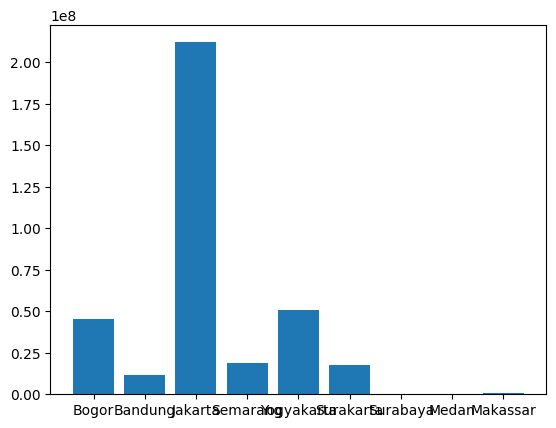

In [103]:
import matplotlib.pyplot as plt

cities = ('Bogor', 'Bandung', 'Jakarta', 'Semarang', 'Yogyakarta',
         'Surakarta','Surabaya', 'Medan', 'Makassar')

populations = (45076704, 11626410, 212162757, 19109629, 50819826, 17579085,
              3481, 287750, 785409)

plt.bar(x=cities, height=populations)
plt.show()

Kode di atas akan menghasilkan tampilan visualisasi yang sedikit lebih baik seperti berikut.



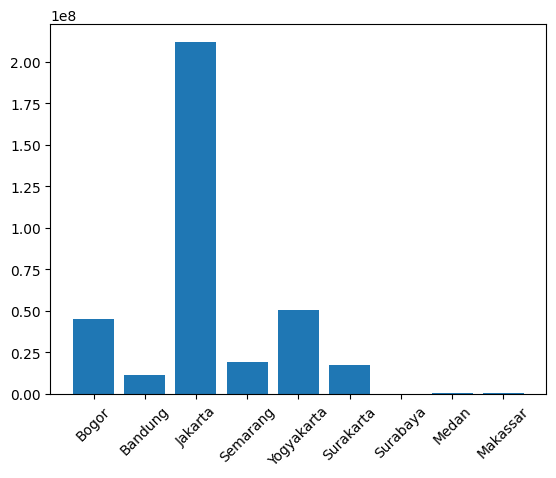

In [104]:
plt.bar(x=cities, height=populations)
plt.xticks(rotation=45)
plt.show()

Hasil visualisasi di atas tentunya jauh lebih baik jika dibandingkan dengan hasil bar chart sebelumnya. Sebenarnya kita bisa merepresentasikan data ini secara lebih baik menggunakan function barh(). Untuk menggunakan function tersebut kita harus mendefinisikan parameter y dan width dari bar chart yang ingin dibuat. Berikut merupakan contoh kode untuk melakukannya.




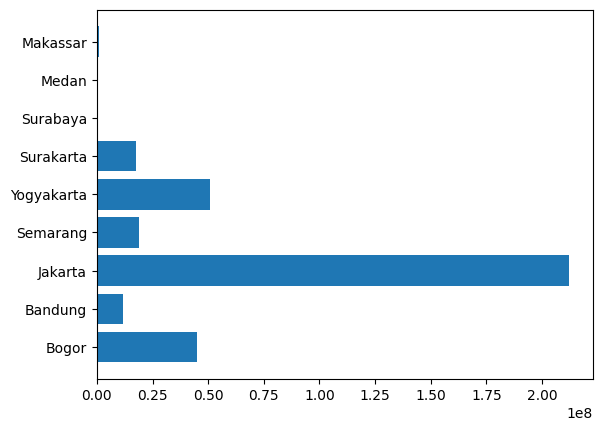

In [105]:
plt.barh(y=cities, width=populations)
plt.show()

Nah, jika diperhatikan data tersebut merupakan data nominal sehingga kita boleh mengurutkan nilainya berdasarkan jumlah populasi terbanyak. Untuk melakukan hal ini, kita membutuhkan bantuan library pandas dalam mengubah data menjadi DataFrame dan mengurutkannya menggunakan function sort_values(). Berikut contoh kode yang dapat Anda gunakan.

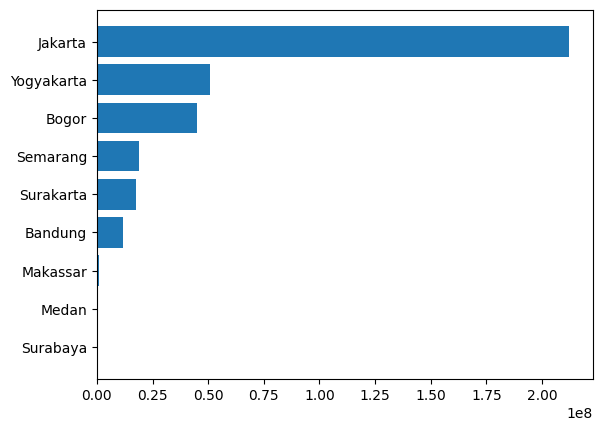

In [106]:
import pandas as pd

df = pd.DataFrame({
    'Cities': cities,
    'Population': populations,
})

df.sort_values(by='Population', inplace=True)

plt.barh(y=df["Cities"], width=df["Population"])
plt.show()

Kode di atas akan menghasilkan bentuk visualisasi data yang lebih mudah diamti

 Untuk memperjelas visualisasi data yang dibuat, kita bisa menambahkan beberapa keterangan seperti judul dan keterangan sumbu. Untuk melakukan hal ini, kita bisa menggunakan function title(), xlabel(), dan ylabel(). Kode di bawah ini merupakan contoh kode untuk menambah keterangan pada hasil plot visualisasi data.

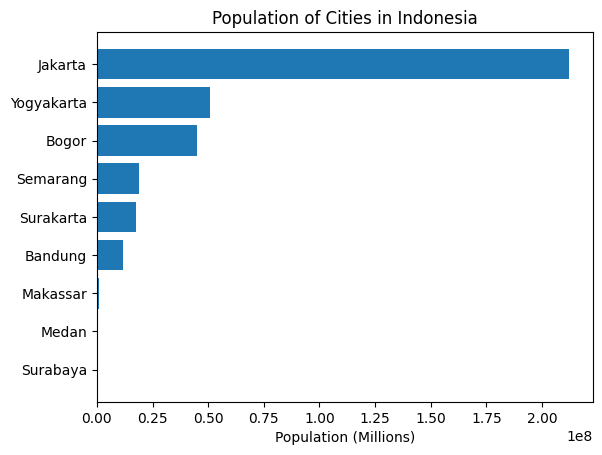

In [107]:
plt.barh(y=df["Cities"], width=df["Population"])
plt.xlabel("Population (Millions)")
plt.title("Population of Cities in Indonesia")
plt.show()

Kode di atas akan menghasilkan visualisasi data seperti ini

Selain menggunakan library matplotlib, kita juga bisa membuat bar chart menggunakan library seaborn. Untuk membuat bar chart menggunakan library seaborn, kita bisa menggunakan function barplot(). Function ini akan menyediakan beberapa parameter penting seperti berikut.

data: menampung DataFrame yang akan digunakan.
x, y: menampung nama kolom atau data yang divisualisasikan.
orient: orientasi dari bar chart yang akan digunakan (“v” atau “h”).
color: mendefinisikan warna yang akan digunakan.
Berikut contoh kode untuk membuat bar chart dengan library seaborn.

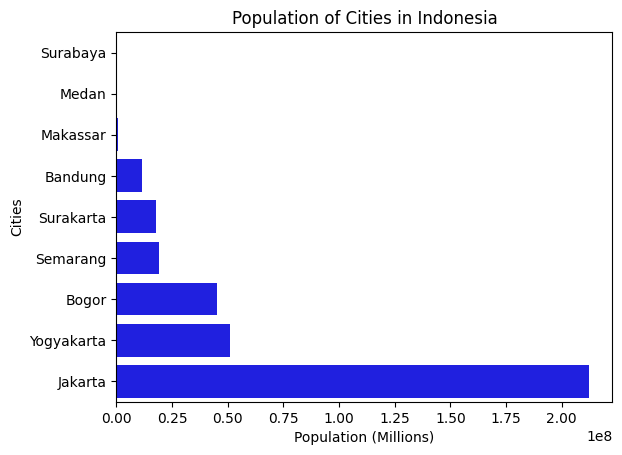

In [108]:
import seaborn as sns

sns.barplot(y=df["Cities"], x=df["Population"], orient="h", color='blue')
plt.xlabel("Population (Millions)")
plt.title("Population of Cities in Indonesia")
plt.show()

Berikut contoh kode untuk membuat grafik pie chart.

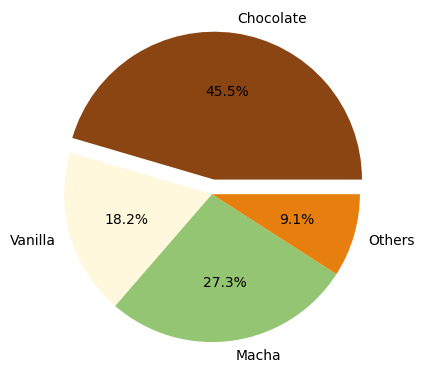

In [109]:
import matplotlib.pyplot as plt

flavors = ('Chocolate', 'Vanilla', 'Macha', 'Others')
votes = (50, 20, 30, 10)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)

plt.pie(
    x=votes,
    labels=flavors,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()


Kode di atas akan menghasilkan tampilan visualisasi data seperti ini

menggunakan parameter wedgeprops untuk menghasilkan donut plot. Parameter ini digunakan untuk mengatur ukuran dari lubang yang dihasilkan. Berikut contoh kodenya.

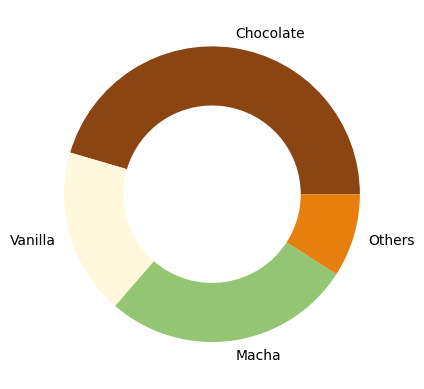

In [110]:
plt.pie(
    x=votes,
    labels=flavors,
    colors=colors,
    wedgeprops = {'width': 0.4}
)
plt.show()

Kode di atas, akan menghasilkan tampilan visual seperti ini

Berikut merupakan contoh kode untuk membuat grafik histogram.

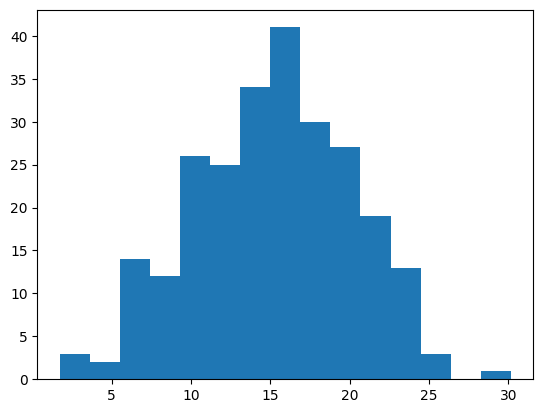

In [111]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(15, 5, 250)

plt.hist(x=x, bins=15)
plt.show()

Pada contoh kode di atas, kita menggunakan function random.normal() yang disediakan oleh library numpy untuk menghasilkan sampel data acak yang memiliki distribusi normal. Sample data random tersebut memiliki jumlah 250 titik data dengan nilai mean sebesar 15 dan standard deviation sebesar 5. Kode di atas akan menghasilkan grafik sepert ini

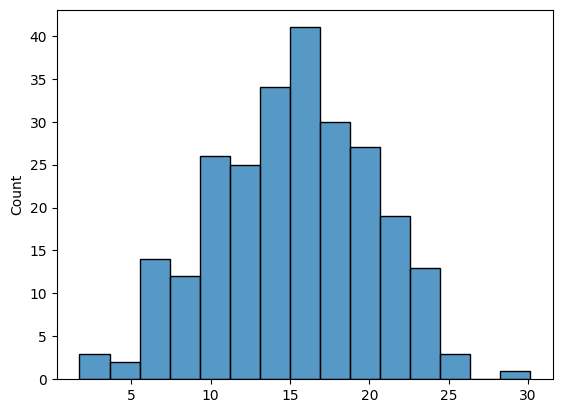

In [112]:
import seaborn as sns

sns.histplot(x=x, bins=15)
plt.show()

Kode di atas akan menghasilkan grafik histogram seperti ini

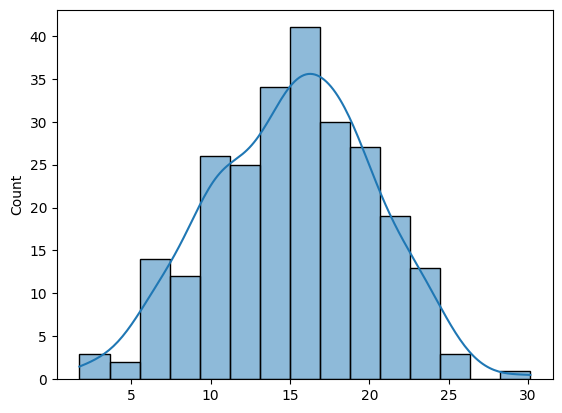

In [113]:
sns.histplot(x=x, bins=15, kde=True)
plt.show()


Kode tersebut akan menghasilkan grafik histogram yang disertai sebuah garis. Garis tersebut menunjukkan densitas distribusi berdasarkan grafik histogram yang dihasilkan.



 menggunakan function boxplot() yang disediakan oleh library seaborn. Berikut contoh kode untuk menggunakannya.

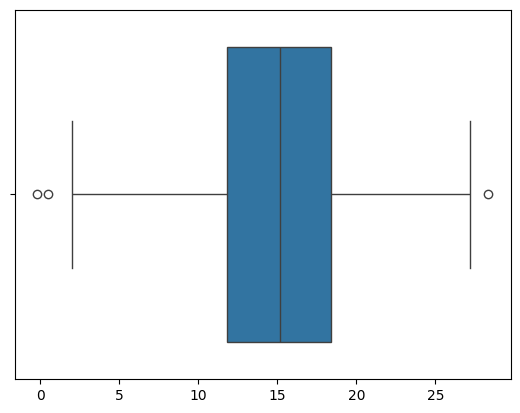

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.random.normal(15, 5, 250)
sns.boxplot(x=x)
plt.show()

Kode di atas akan menghasilkan visualisasi data seperti ini

membuat scatter plot, kita bisa menggunakan library matplotlib. Ia telah menyediakan sebuah function bernama scatter() untuk membantu kita membuat scatter plot secara lebih mudah.

Berikut contoh kode untuk menggunakannya.

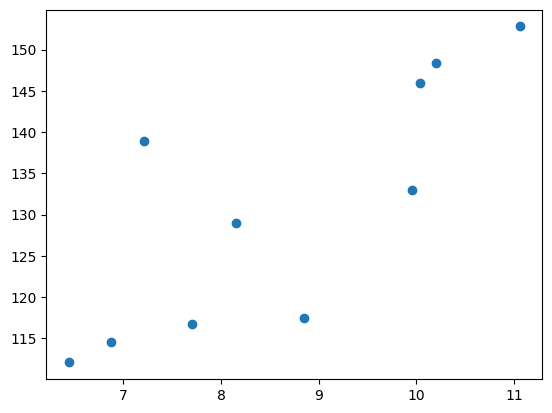

In [115]:

import matplotlib.pyplot as plt

lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15,
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93,
                132.93, 138.92, 145.98, 148.44, 152.81]

plt.scatter(x=lemon_diameter, y=lemon_weight)
plt.show()

Kode di atas akan menghasilkan visualisasi data seperti ini


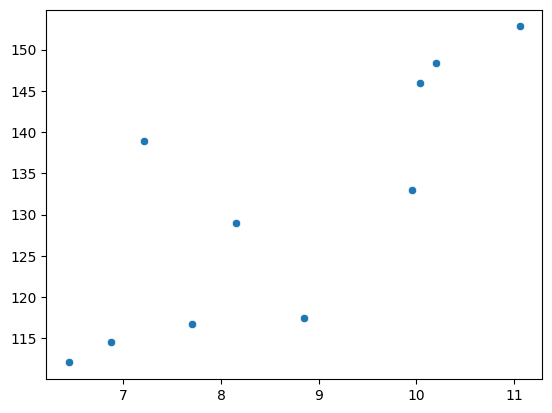

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=lemon_diameter, y=lemon_weight)
plt.show()

untuk mempermudah dalam melihat korelasi atau hubungan antar variabel, kita bisa menggunakan function regplot() yang disediakan oleh library seaborn. Function tersebut memadukan scatter plot dan regression function (metode statistik untuk memperkirakan korelasi antar independent dan dependent variable) untuk melihat tren serta korelasi antar variabel.

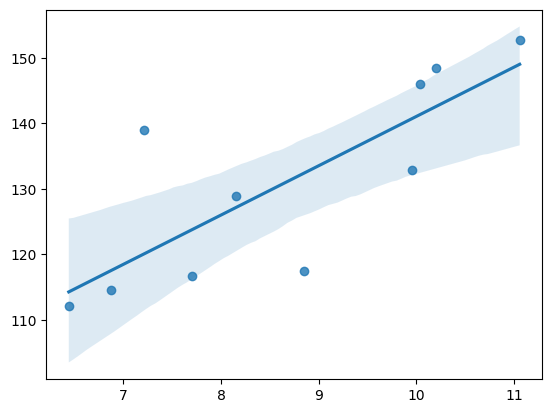

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15,
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93,
                132.93, 138.92, 145.98, 148.44, 152.81]

sns.regplot(x=lemon_diameter, y=lemon_weight)
plt.show()

Bentuk visualisasi data dibawah ini umumnya digunakan untuk melihat trend dari data berbentuk time series (data yang direkam dalam interval waktu yang konsisten). Berikut contoh kode untuk menampilkan plot harga saham Bank Central Asia dengan kode saham BBCA.

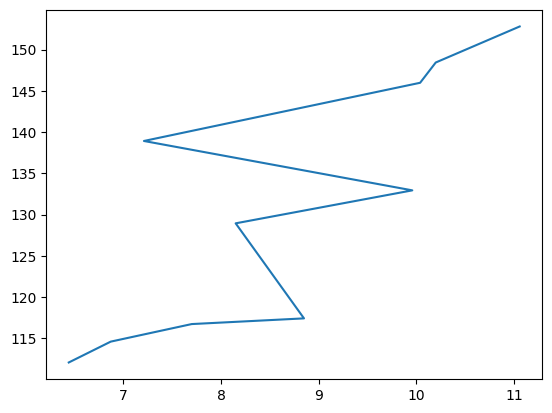

In [118]:
import matplotlib.pyplot as plt

lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15,
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93,
                132.93, 138.92, 145.98, 148.44, 152.81]

plt.plot(lemon_diameter, lemon_weight)
plt.show()

Pada contoh kode di bawah, kita memvisualkan data saham yang diperoleh dari Yahoo Finance. Agar tampilan visualnya enak dilihat, pada contoh ini, kita mengatur ukuran plot-nya dengan argumen figsize pada function figure(). Berikut merupakan visualisasi data yang dihasilkan.

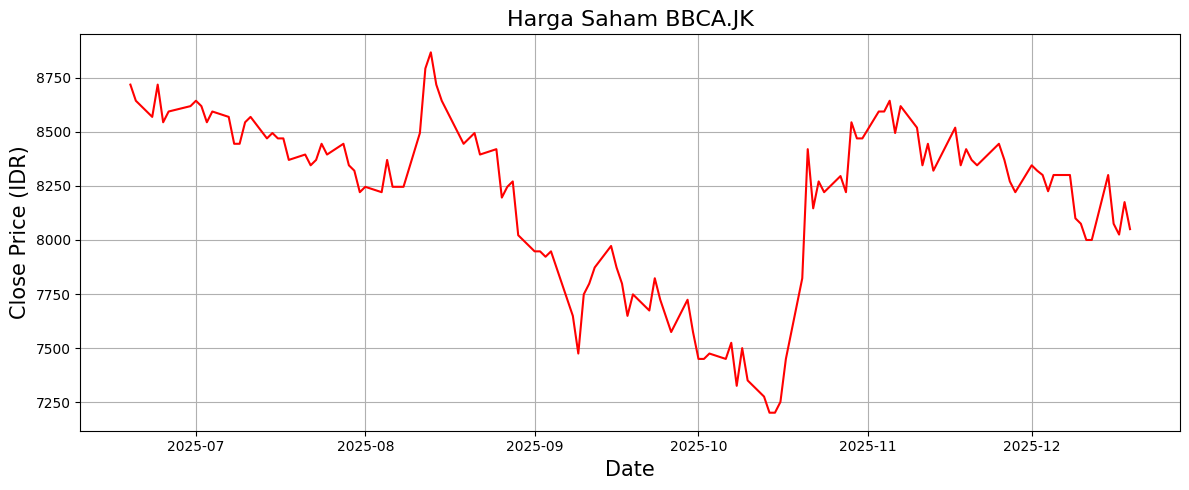

In [119]:
import yfinance as yf
import matplotlib.pyplot as plt

# Unduh data historis saham BBCA.JK
ticker = yf.Ticker("BBCA.JK")
df = ticker.history(period="6mo", interval="1d")  # atau bisa diubah ke "1y", dll

# Reset index agar tanggal menjadi kolom
df.reset_index(inplace=True)

# Visualisasi harga penutupan
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], color='red')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price (IDR)', fontsize=15)
plt.title('Harga Saham BBCA.JK', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

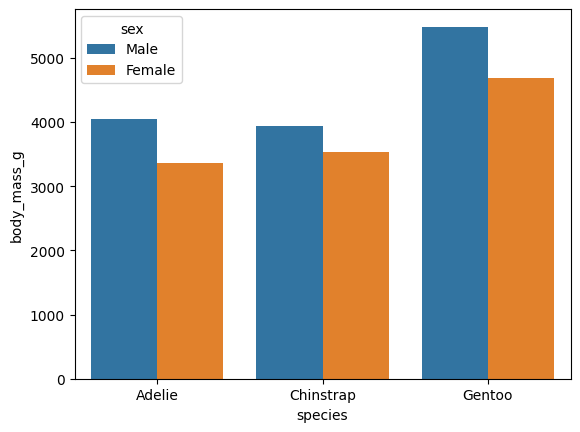

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")

sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", errorbar=None)
plt.show()

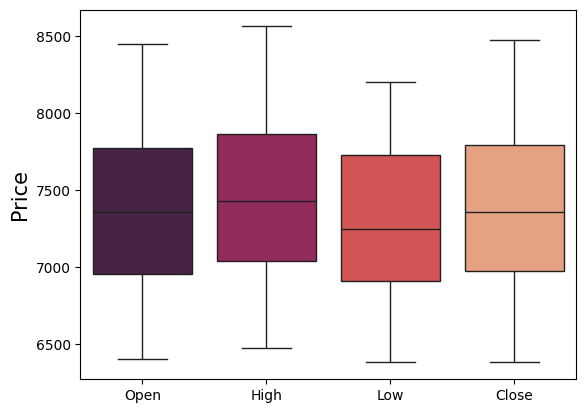

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # Import yfinance

# The original URL caused a 429 error due to rate limiting.
# url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
# df = pd.read_csv(url) # This line was causing the error

# Use yfinance to download the data for the same period (Feb 14, 2022 to Feb 14, 2023)
ticker = yf.Ticker("BBCA.JK")
df = ticker.history(start="2022-02-14", end="2023-02-14", interval="1d")

# Reset index to get 'Date' as a column and ensure it's datetime type
df.reset_index(inplace=True);
df['Date'] = pd.to_datetime(df['Date'])

df_boxplot = df[["Open", "High", "Low", "Close"]]

sns.boxplot(data=df_boxplot, palette="rocket")
plt.ylabel('Price',size=15)
plt.show()

Nah, dengan visualisasi data tersebut, kita dapat membandingkan berbagai variabel yang digunakan untuk mendeskripsikan harga saham. Namun, perlu diingat bahwa hal ini hanya boleh dilakukan untuk membandingkan nilai variabel yang merepresentasikan unit atau satuan ukur yang sama (contoh di atas sama-sama menggambarkan harga saham).

Selain itu, kita juga bisa memodifikasi scatter plot menggunakan shape atau color yang berbeda guna menampilkan hubungan lebih dari dua variabel data. Seperti pada contoh berikut.

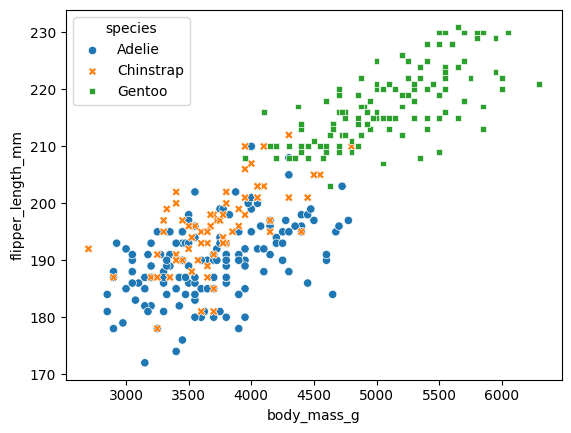

In [122]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species", style="species")
plt.show()


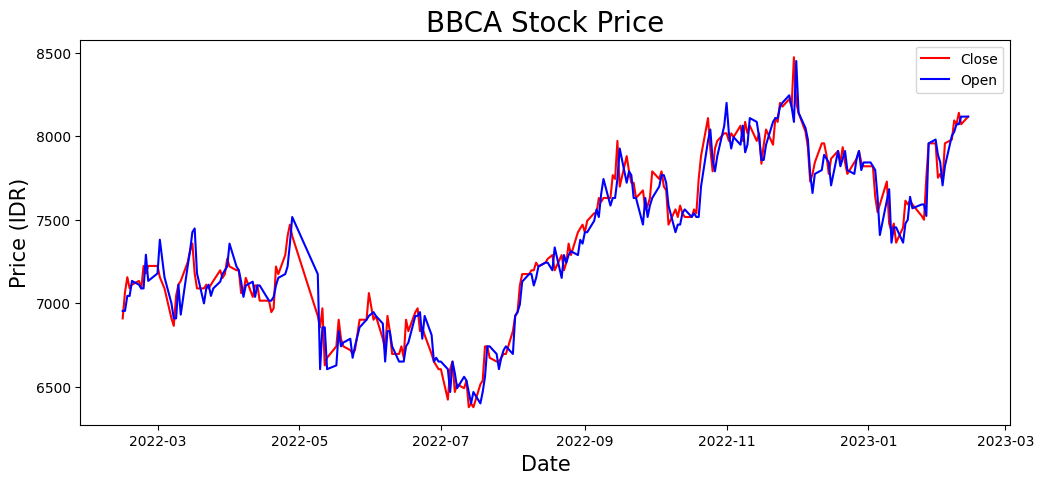

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker = yf.Ticker("BBCA.JK")
df = ticker.history(start="2022-02-14", end="2023-02-14")
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
# df = pd.read_csv(url)
# df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Close', color='red')
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.title('BBCA Stock Price', size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Price (IDR)',size=15)
plt.legend()
plt.show()

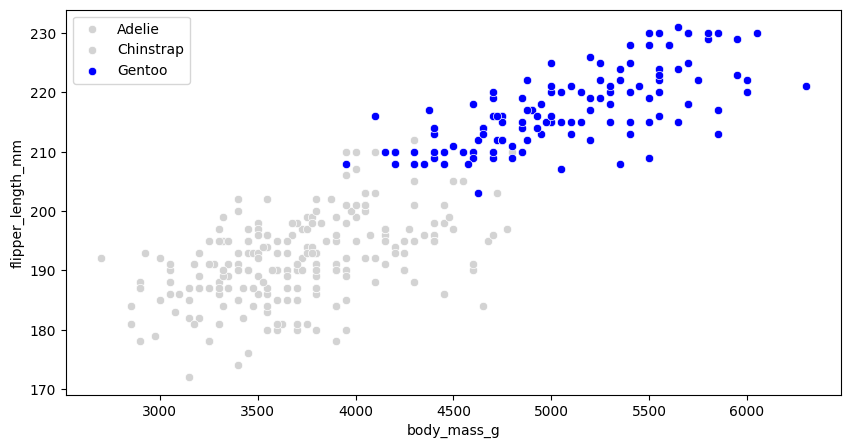

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins_df = sns.load_dataset("penguins")

adelie_df = penguins_df[penguins_df.species == "Adelie"]
chinstrap_df = penguins_df[penguins_df.species == "Chinstrap"]
gentoo_df = penguins_df[penguins_df.species == "Gentoo"]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=adelie_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Adelie")
sns.scatterplot(data=chinstrap_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Chinstrap")
sns.scatterplot(data=gentoo_df, x="body_mass_g", y="flipper_length_mm", facecolor="blue", label="Gentoo")
plt.legend()
plt.show()

LATIHAN PERTEMUAN 11
NAMA: ALDI TOGAR
NIM: 4232401018


contoh kode untuk mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya.

In [132]:
all_df = pd.merge(orders_df, sales_df, on="order_id", how="left")

monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,2021-01,109,119333.0
1,2021-02,94,95080.0
2,2021-03,118,131364.0
3,2021-04,101,97530.0
4,2021-05,84,85597.0


Pada kode di atas, kita ingin melakukan resample data order_date menjadi bulanan serta melakukan agregasi terhadap data tersebut untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh tiap bulan. Gambar di bawah ini merupakan tampilan dari data tersebut.

bentuk line chart untuk memvisualkan informasi terkait jumlah order dan total revenue yang diperoleh tiap bulan.

/tmp/ipython-input-1289995088.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


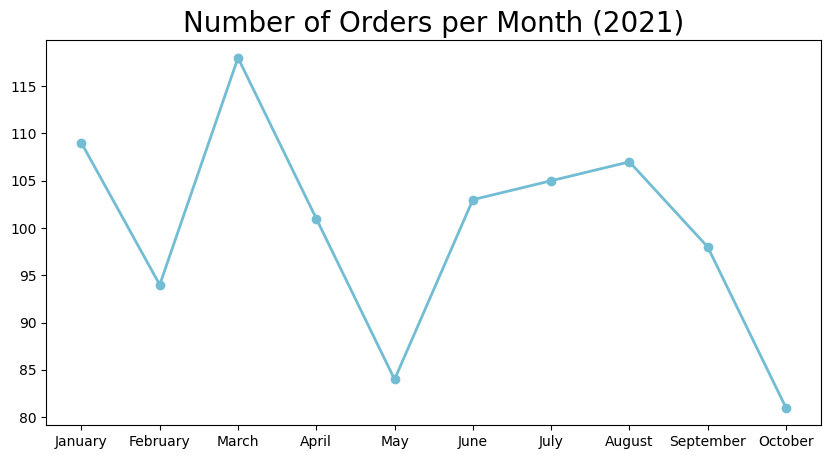

In [126]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan Maret. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Februari, April, Mei, dan Oktober.

line chart menggunakan contoh kode berikut.

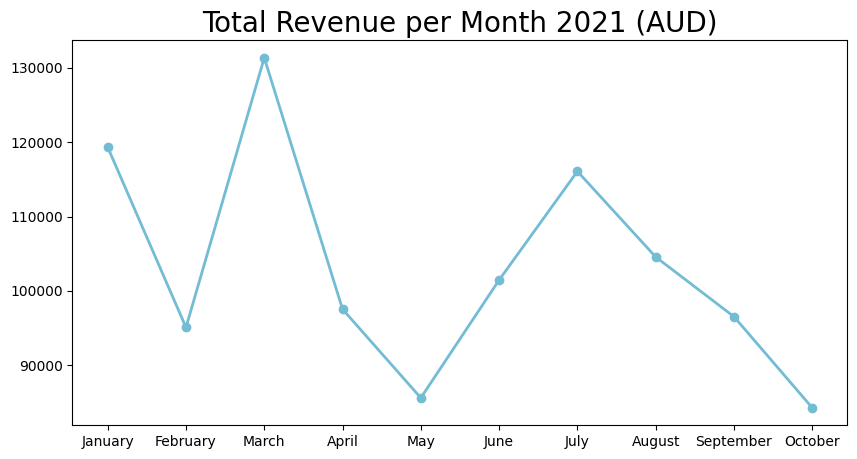

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month 2021 (AUD)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Penurunan jumlah orderan yang sangat signifikan terjadi pada bulan Februari, April, Mei, dan Oktober berdampak terhadap penurunan revenue perusahaan. Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll. Namun, untuk studi kasus ini, kita tidak memiliki cukup informasi terkait hal tersebut.

membuat sebuah DataFrame baru guna menampung informasi terkait jumlah penjualan tiap produk. Berikut merupakan contoh kode untuk melakukannya.

In [131]:
all_df = pd.merge(orders_df, sales_df, on="order_id", how="left")
all_df = pd.merge(all_df, products_df, on="product_id", how="left")

sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_name,quantity_x
0,Denim,527.0
1,Joggers,334.0
2,Pleated,308.0
3,Casual Slim Fit,306.0
4,Shearling,302.0
5,Relaxed Leg,301.0
6,Trench Coat,299.0
7,Puffer,298.0
8,Bomber,297.0
9,Chambray,290.0


In [133]:
all_df = pd.merge(orders_df, sales_df, on="order_id", how="left")

monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,2021-01,109,119333.0
1,2021-02,94,95080.0
2,2021-03,118,131364.0
3,2021-04,101,97530.0
4,2021-05,84,85597.0
